# Table of Contents

# 1. Import Libraries & Data

# 2. Merge department data and the normal revenue customers data.

# 3. Create a profiling variable

# 4. Export Data

# 5. Distribution of Profiles - Visualization

# 6. Aggregate the max, min and mean variables

# 7. Compare the customer profiles

# 1. Import Libraries & Data

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create path to import the datasets

path = r'C:\Users\srira\OneDrive\Documents\Instacart Basket Analysis'

In [3]:
# Importing dataset normal_revenue_customers.pkl

df_merge = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'normal_revenue_customers.pkl'))

In [4]:
df_merge.shape

(30964564, 33)

In [5]:
df_merge.head()

,order_id,user_id,order_number,orders_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,State,Age,date_joined,Number_of_dependants,Family_Status,income,_merge,Region,Activity flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Normal activity
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Normal activity
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Normal activity
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Normal activity
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Normal activity


In [6]:
# Importing dataset departments_wrangled.csv

df_dept = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'departments_wrangled.csv'))

In [7]:
df_dept.shape

(21, 2)

In [8]:
df_dept.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [9]:
# Renaming the column 'Unnamed: 0' to 'department_id'

df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [10]:
# Check the output

df_dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [11]:
# Displays the column names and its data types in the dataset

df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404854
Data columns (total 33 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   order_number            int64   
 3   orders_days_of_week     int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  price_range_loc         object  
 14  busiest day             object  
 15  busiest days            object  
 16  busiest_period_of_day   object  
 17  max_order               int64   
 18  loyalty_flag            object  
 19  average_price           float64 
 20  spending_flag           object  
 21  median     

# 2. Merging both the dataframes

In [12]:
# Dropping the column '_merge' as it would interfere with the column that would be created with the new merge.

df_merge = df_merge.drop(columns = ['_merge'])

In [13]:
# Merging the dataset normal revenue customers and department using 'department_id' as the key

df_opd = df_merge.merge(df_dept, on = 'department_id', indicator = True)

In [14]:
df_opd.shape

(30964564, 34)

In [15]:
# Check the output

df_opd.head(5)


,order_id,user_id,order_number,orders_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,State,Age,date_joined,Number_of_dependants,Family_Status,income,Region,Activity flag,department,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages,both


In [16]:
df_opd['_merge'].value_counts()

_merge
both          30964564
left_only            0
right_only           0
Name: count, dtype: int64

# 3. Create a profiling variable

# Age groups

In [17]:
df_opd['Age'].min()

18

In [18]:
df_opd['Age'].max()

81

In [19]:
# Creating age groups between 18 and 81

df_opd.loc[(df_opd['Age'] >= 18) & (df_opd['Age'] <= 29), 'Age_group'] = '18 - 29 years old'

C:\Users\srira\AppData\Local\Temp\ipykernel_4644\2391875089.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '18 - 29 years old' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_opd.loc[(df_opd['Age'] >= 18) & (df_opd['Age'] <= 29), 'Age_group'] = '18 - 29 years old'


In [20]:
df_opd.loc[(df_opd['Age'] >= 30) & (df_opd['Age'] <= 39), 'Age_group'] = '30 - 39 years old'

In [21]:
df_opd.loc[(df_opd['Age'] >= 40) & (df_opd['Age'] <= 49), 'Age_group'] = '40 - 49 years old'

In [22]:
df_opd.loc[(df_opd['Age'] >= 50) & (df_opd['Age'] <= 59), 'Age_group'] = '50 - 59 years old'

In [23]:
df_opd.loc[(df_opd['Age'] >= 60) & (df_opd['Age'] <= 69), 'Age_group'] = '60 - 69 years old'

In [24]:
df_opd.loc[(df_opd['Age'] >= 70) & (df_opd['Age'] <= 81), 'Age_group'] = '70 - 81 years old'

In [25]:
# Dispplays the counts for each of the age groups

df_opd['Age_group'].value_counts(dropna = False)

Age_group
18 - 29 years old    5817603
70 - 81 years old    5812883
40 - 49 years old    4883179
30 - 39 years old    4847507
50 - 59 years old    4841771
60 - 69 years old    4761621
Name: count, dtype: int64

# Income groups

In [26]:
df_opd['income'].min()

25903

In [27]:
df_opd['income'].max()

593901

In [28]:
# Creating income groups between 25903 and 593901

df_opd.loc[(df_opd['income'] >= 25000) & (df_opd['income'] <= 100000), 'Income_group'] = 'lower income'

C:\Users\srira\AppData\Local\Temp\ipykernel_4644\3502236000.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'lower income' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_opd.loc[(df_opd['income'] >= 25000) & (df_opd['income'] <= 100000), 'Income_group'] = 'lower income'


In [29]:
df_opd.loc[(df_opd['income'] >= 100000) & (df_opd['income'] <= 200000), 'Income_group'] = 'middle income'

In [30]:
df_opd.loc[df_opd['income'] > 200000, 'Income_group'] = 'high income'

In [31]:
# Displays the counts for each of the income groups

df_opd['Income_group'].value_counts(dropna = False)

Income_group
lower income     16757162
middle income    13953260
high income        254142
Name: count, dtype: int64

# Dependant groups

In [32]:
df_opd['Number_of_dependants'].min()

0

In [33]:
df_opd['Number_of_dependants'].max()

3

In [34]:
# Creating dependant groups

df_opd.loc[df_opd['Number_of_dependants'] <= 0, 'Dependants_group'] = 'no dependants'

C:\Users\srira\AppData\Local\Temp\ipykernel_4644\2720041480.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'no dependants' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_opd.loc[df_opd['Number_of_dependants'] <= 0, 'Dependants_group'] = 'no dependants'


In [35]:
df_opd.loc[df_opd['Number_of_dependants'] > 0, 'Dependants_group'] = 'has dependants'

In [36]:
# Displays the count of the dependants group

df_opd['Dependants_group'].value_counts(dropna = False)

Dependants_group
has dependants    23224883
no dependants      7739681
Name: count, dtype: int64

In [37]:
df_opd.head()

,order_id,user_id,order_number,orders_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Number_of_dependants,Family_Status,income,Region,Activity flag,department,_merge,Age_group,Income_group,Dependants_group
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,3,married,40423,South,Normal activity,beverages,both,30 - 39 years old,lower income,has dependants
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,3,married,40423,South,Normal activity,beverages,both,30 - 39 years old,lower income,has dependants
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,3,married,40423,South,Normal activity,beverages,both,30 - 39 years old,lower income,has dependants
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,3,married,40423,South,Normal activity,beverages,both,30 - 39 years old,lower income,has dependants
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,3,married,40423,South,Normal activity,beverages,both,30 - 39 years old,lower income,has dependants


# Marital status

In [38]:
# Displays the count of the marital status
df_opd['Family_Status'].value_counts(dropna = False)

Family_Status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

In [39]:
# Creating a crosstab for 'family_status' and 'dependants_group' 

marital_crosstab = pd.crosstab(df_opd['Family_Status'], df_opd['Dependants_group'], dropna = False)

In [40]:
marital_crosstab.to_clipboard()

In [41]:
marital_crosstab

Dependants_group,has dependants,no dependants
Family_Status,,
divorced/widowed,0,2645271
living with parents and siblings,1481172,0
married,21743711,0
single,0,5094410


In [42]:
# Creating a crosstab for 'age groups' and 'dependants_group'

age_crosstab = pd.crosstab(df_opd['Age_group'], df_opd['Dependants_group'], dropna = False)

In [43]:
age_crosstab.to_clipboard()

In [44]:
age_crosstab

Dependants_group,has dependants,no dependants
Age_group,,
18 - 29 years old,4369985,1447618
30 - 39 years old,3634550,1212957
40 - 49 years old,3669445,1213734
50 - 59 years old,3621670,1220101
60 - 69 years old,3557155,1204466
70 - 81 years old,4372078,1440805


# Creating profile variable based on age, marital status and dependant group

In [45]:
 df_opd.loc[(df_opd['Age_group'].isin(['18 - 29 years old', '30 - 39 years old'])) & (df_opd['Family_Status'].isin(['single', 'divorced/widowed'])) & (df_opd['Dependants_group'] == 'no dependants'),'profile_flag']=  'young adult without dependants'

C:\Users\srira\AppData\Local\Temp\ipykernel_4644\97434503.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'young adult without dependants' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_opd.loc[(df_opd['Age_group'].isin(['18 - 29 years old', '30 - 39 years old'])) & (df_opd['Family_Status'].isin(['single', 'divorced/widowed'])) & (df_opd['Dependants_group'] == 'no dependants'),'profile_flag']=  'young adult without dependants'


In [46]:
df_opd.loc[(df_opd['Age_group'].isin(['40 - 49 years old', '50 - 59 years old'])) & (df_opd['Family_Status'].isin(['single', 'divorced/widowed'])) & (df_opd['Dependants_group'] == 'no dependants'),'profile_flag']= 'adult without dependants'

In [47]:
df_opd.loc[(df_opd['Age_group'].isin(['60 - 69 years old', '70 - 81 years old'])) & (df_opd['Family_Status'].isin(['single', 'divorced/widowed'])) & (df_opd['Dependants_group'] == 'no dependants'),'profile_flag']= 'older adult without dependants'

In [48]:
df_opd.loc[(df_opd['Age_group'].isin(['18 - 29 years old', '30 - 39 years old'])) & (df_opd['Family_Status'] == 'living with parents and siblings') & (df_opd['Dependants_group'] == 'has dependants'),'profile_flag']= 'young adult with dependants'

In [49]:
df_opd.loc[(df_opd['Age_group'].isin(['40 - 49 years old', '50 - 59 years old'])) & (df_opd['Family_Status'] == 'living with parents and siblings') & (df_opd['Dependants_group'] == 'has dependants'),'profile_flag']= 'adult with dependants'

In [50]:
df_opd.loc[(df_opd['Age_group'].isin(['60 - 69 years old', '70 - 81 years old'])) & (df_opd['Family_Status'] == 'living with parents and siblings') & (df_opd['Dependants_group'] == 'has dependants'),'profile_flag']= 'older adult with dependants'

In [51]:
df_opd.loc[(df_opd['Age_group'].isin(['18 - 29 years old', '30 - 39 years old'])) & (df_opd['Family_Status'] == 'married') & (df_opd['Dependants_group'] == 'has dependants'),'profile_flag']= 'married young adult with dependants'

In [52]:
df_opd.loc[(df_opd['Age_group'].isin(['40 - 49 years old', '50 - 59 years old'])) & (df_opd['Family_Status'] == 'married') & (df_opd['Dependants_group'] == 'has dependants'),'profile_flag']= 'married adult with dependants'

In [53]:
df_opd.loc[(df_opd['Age_group'].isin(['60 - 69 years old', '70 - 81 years old'])) & (df_opd['Family_Status'] == 'married') & (df_opd['Dependants_group'] == 'has dependants'),'profile_flag']= 'married older adult with dependants'

In [54]:
df_opd['profile_flag'].value_counts(dropna = False)

profile_flag
married older adult with dependants    7929233
married adult with dependants          7291115
married young adult with dependants    6523363
young adult without dependants         2660575
older adult without dependants         2645271
adult without dependants               2433835
young adult with dependants            1481172
Name: count, dtype: int64

# Creating profiling variable based on age, income, marital status and dependant group

In [96]:
# Low income single young adults without dependants

df_opd.loc[(df_opd['Age_group'].isin(['18 - 29 years old', '30 - 39 years old'])) & (df_opd['Family_Status'].isin(['single', 'divorced/widowed'])) & (df_opd['Income_group'] =='lower income') & (df_opd['Dependants_group'] == 'no dependants'),'customer_profile']= 'low income young adults without dependants'

In [97]:
# Low income single adults without dependents

df_opd.loc[(df_opd['Age_group'].isin(['40 - 49 years old', '50 - 59 years old'])) & (df_opd['Family_Status'].isin(['single', 'divorced/widowed'])) & (df_opd['Income_group'] =='lower income') & (df_opd['Dependants_group'] == 'no dependants'),'customer_profile']= 'low income adult without dependants'

In [98]:
# Low income single older adults without dependents

df_opd.loc[(df_opd['Age_group'].isin(['60 - 69 years old', '70 - 81 years old'])) & (df_opd['Family_Status'].isin(['single', 'divorced/widowed'])) & (df_opd['Income_group'] =='lower income') & (df_opd['Dependants_group'] == 'no dependants'),'customer_profile']= 'low income older adult without dependants'

In [99]:
# Low income single young adults with dependants

df_opd.loc[(df_opd['Age_group'].isin(['18 - 29 years old', '30 - 39 years old'])) & (df_opd['Family_Status'] == 'living with parents and siblings') & (df_opd['Income_group'] =='lower income') & (df_opd['Dependants_group'] == 'has dependants'),'customer_profile']= 'low income young adult with dependants'

In [100]:
# Low income single adult with dependants

df_opd.loc[(df_opd['Age_group'].isin(['40 - 49 years old', '50 - 59 years old'])) & (df_opd['Family_Status'] == 'living with parents and siblings') & (df_opd['Income_group'] =='lower income') & (df_opd['Dependants_group'] == 'has dependants'),'customer_profile']= 'low income adult with dependants'

In [101]:
# Low income single older adult with dependants

df_opd.loc[(df_opd['Age_group'].isin(['60 - 69 years old', '70 - 81 years old'])) & (df_opd['Family_Status'] == 'living with parents and siblings') & (df_opd['Income_group'] =='lower income') & (df_opd['Dependants_group'] == 'has dependants'),'customer_profile']= 'low income older adult with dependants'

In [102]:
# Low income married young adults with dependants

df_opd.loc[(df_opd['Age_group'].isin(['18 - 29 years old', '30 - 39 years old'])) & (df_opd['Family_Status'] == 'married') & (df_opd['Income_group'] =='lower income') & (df_opd['Dependants_group'] == 'has dependants'),'customer_profile']= 'low income married young adult with dependants'

In [103]:
# Low income married adults with dependants

df_opd.loc[(df_opd['Age_group'].isin(['40 - 49 years old', '50 - 59 years old'])) & (df_opd['Family_Status'] == 'married') & (df_opd['Income_group'] =='lower income') & (df_opd['Dependants_group'] == 'has dependants'),'customer_profile']= 'low income married adult with dependants'

In [104]:
# Low income married older adults with dependants

df_opd.loc[(df_opd['Age_group'].isin(['60 - 69 years old', '70 - 81 years old'])) & (df_opd['Family_Status'] == 'married') & (df_opd['Income_group'] =='lower income') & (df_opd['Dependants_group'] == 'has dependants'),'customer_profile']= 'low income married older adult with dependants'

In [105]:
# Mid income single young adult without dependants

df_opd.loc[(df_opd['Age_group'].isin(['18 - 29 years old', '30 - 39 years old'])) & (df_opd['Family_Status'].isin(['single', 'divorced/widowed'])) & (df_opd['Income_group'] =='middle income') & (df_opd['Dependants_group'] == 'no dependants'),'customer_profile']= 'mid income young adult without dependants'

In [106]:
# Mid income single adult without dependants

df_opd.loc[(df_opd['Age_group'].isin(['40 - 49 years old', '50 - 59 years old'])) & (df_opd['Family_Status'].isin(['single', 'divorced/widowed'])) & (df_opd['Income_group'] =='middle income') & (df_opd['Dependants_group'] == 'no dependants'),'customer_profile']= 'mid income adult without dependants'

In [107]:
# Mid income single adult without dependants

df_opd.loc[(df_opd['Age_group'].isin(['60 - 69 years old', '70 - 81 years old'])) & (df_opd['Family_Status'].isin(['single', 'divorced/widowed'])) & (df_opd['Income_group'] =='middle income') & (df_opd['Dependants_group'] == 'no dependants'),'customer_profile']= 'mid income older adult without dependants'

In [108]:
# Mid income single young adult with dependants

df_opd.loc[(df_opd['Age_group'].isin(['18 - 29 years old', '30 - 39 years old'])) & (df_opd['Family_Status'] == 'living with parents and siblings') & (df_opd['Income_group'] =='middle income') & (df_opd['Dependants_group'] == 'has dependants'),'customer_profile']= 'mid income young adult with dependants'

In [109]:
# Mid income single adult with dependants

df_opd.loc[(df_opd['Age_group'].isin(['40 - 49 years old', '50 - 59 years old'])) & (df_opd['Family_Status'] == 'living with parents and siblings') & (df_opd['Income_group'] =='middle income') & (df_opd['Dependants_group'] == 'has dependants'),'customer_profile']= 'mid income adult with dependants'

In [110]:
# Mid income single older adult with dependants

df_opd.loc[(df_opd['Age_group'].isin(['60 - 69 years old', '70 - 81 years old'])) & (df_opd['Family_Status'] == 'living with parents and siblings') & (df_opd['Income_group'] =='middle income') & (df_opd['Dependants_group'] == 'has dependants'),'customer_profile']= 'mid income older adult with dependants'

In [111]:
# Mid income married young adult with dependants

df_opd.loc[(df_opd['Age_group'].isin(['18 - 29 years old', '30 - 39 years old'])) & (df_opd['Family_Status'] == 'married') & (df_opd['Income_group'] =='middle income') & (df_opd['Dependants_group'] == 'has dependants'),'customer_profile']= 'mid income married young adult with dependants'

In [112]:
# Mid income married adult with dependants

df_opd.loc[(df_opd['Age_group'].isin(['40 - 49 years old', '50 - 59 years old'])) & (df_opd['Family_Status'] == 'married') & (df_opd['Income_group'] =='middle income') & (df_opd['Dependants_group'] == 'has dependants'),'customer_profile']= 'mid income married adult with dependants'

In [113]:
# Mid income married adult with dependants

df_opd.loc[(df_opd['Age_group'].isin(['60 - 69 years old', '70 - 81 years old'])) & (df_opd['Family_Status'] == 'married') & (df_opd['Income_group'] =='middle income') & (df_opd['Dependants_group'] == 'has dependants'),'customer_profile']= 'mid income married older adult with dependants'

In [114]:
# High income married young adult without dependants

df_opd.loc[(df_opd['Age_group'].isin(['18 - 29 years old', '30 - 39 years old'])) & (df_opd['Family_Status'].isin(['single', 'divorced/widowed'])) & (df_opd['Income_group'] =='high income') & (df_opd['Dependants_group'] == 'no dependants'),'customer_profile']= 'high income young adult without dependants'

In [115]:
# High income single adult without dependants

df_opd.loc[(df_opd['Age_group'].isin(['40 - 49 years old', '50 - 59 years old'])) & (df_opd['Family_Status'].isin(['single', 'divorced/widowed'])) & (df_opd['Income_group'] =='high income') & (df_opd['Dependants_group'] == 'no dependants'),'customer_profile']= 'high income adult without dependants'

In [116]:
# High income single older adult without dependants

df_opd.loc[(df_opd['Age_group'].isin(['60 - 69 years old', '70 - 81 years old'])) & (df_opd['Family_Status'].isin(['single', 'divorced/widowed'])) & (df_opd['Income_group'] =='high income') & (df_opd['Dependants_group'] == 'no dependants'),'customer_profile']= 'high income older adult without dependants'

In [117]:
# High income single young adult with dependants

df_opd.loc[(df_opd['Age_group'].isin(['18 - 29 years old', '30 - 39 years old'])) & (df_opd['Family_Status'] == 'living with parents and siblings') & (df_opd['Income_group'] =='high income') & (df_opd['Dependants_group'] == 'has dependants'),'customer_profile']= 'high income young adult with dependants'

In [118]:
# High income single adult with dependants

df_opd.loc[(df_opd['Age_group'].isin(['40 - 49 years old', '50 - 59 years old'])) & (df_opd['Family_Status'] == 'living with parents and siblings') & (df_opd['Income_group'] =='high income') & (df_opd['Dependants_group'] == 'has dependants'),'customer_profile']= 'high income adult with dependants'

In [119]:
# High income single older adults with dependants

df_opd.loc[(df_opd['Age_group'].isin(['60 - 69 years old', '70 - 81 years old'])) & (df_opd['Family_Status'] == 'living with parents and siblings') & (df_opd['Income_group'] =='high income') & (df_opd['Dependants_group'] == 'has dependants'),'customer_profile']= 'high income older adult with dependants'

In [120]:
# High income married young adults with dependants

df_opd.loc[(df_opd['Age_group'].isin(['18 - 29 years old', '30 - 39 years old'])) & (df_opd['Family_Status'] == 'married') & (df_opd['Income_group'] =='high income') & (df_opd['Dependants_group'] == 'has dependants'),'customer_profile']= 'high income married young adult with dependants'

In [121]:
# High income married adults with dependants

df_opd.loc[(df_opd['Age_group'].isin(['40 - 49 years old', '50 - 59 years old'])) & (df_opd['Family_Status'] == 'married') & (df_opd['Income_group'] =='high income') & (df_opd['Dependants_group'] == 'has dependants'),'customer_profile']= 'high income married adult with dependants'

In [122]:
# High income married adults with dependants

df_opd.loc[(df_opd['Age_group'].isin(['60 - 69 years old', '70 - 81 years old'])) & (df_opd['Family_Status'] == 'married') & (df_opd['Income_group'] =='high income') & (df_opd['Dependants_group'] == 'has dependants'),'customer_profile']= 'high income married older adult with dependants'

In [123]:
df_opd['customer_profile'].value_counts(dropna = False)

customer_profile
low income married young adult with dependants     6313265
mid income married older adult with dependants     5464215
mid income married adult with dependants           4754848
low income young adults without dependants         2572985
low income married adult with dependants           2459831
low income married older adult with dependants     2379717
mid income older adult without dependants          1821775
mid income adult without dependants                1606462
low income young adult with dependants             1433624
low income older adult without dependants           799069
low income adult without dependants                 798671
mid income married young adult with dependants      186357
high income married older adult with dependants      85301
high income married adult with dependants            76436
mid income young adult without dependants            76113
mid income young adult with dependants               43490
high income adult without dependants   

In [83]:
df_opd['income'].value_counts(dropna = False)

income
72344     4395
112610    4242
57501     4136
115620    3831
36163     3657
          ... 
52741        5
48493        5
33040        5
91717        5
147660       2
Name: count, Length: 96069, dtype: int64

In [85]:
df_opd['income'].dtype

dtype('int64')

In [87]:
df_opd['Age_group'].value_counts(dropna = False)

Age_group
18 - 29 years old    5817603
70 - 81 years old    5812883
40 - 49 years old    4883179
30 - 39 years old    4847507
50 - 59 years old    4841771
60 - 69 years old    4761621
Name: count, dtype: int64

In [88]:
df_opd['Income_group'].value_counts(dropna = False)

Income_group
lower income     16757162
middle income    13953260
high income        254142
Name: count, dtype: int64

In [91]:
df_opd['Dependants_group'].value_counts(dropna = False)

Dependants_group
has dependants    23224883
no dependants      7739681
Name: count, dtype: int64

# Exporting data

In [124]:
# Exporting dataframe df_opd to merged_opd.pkl

df_opd.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'merged_opd.pkl'))

# Distribution of Profiles - Visualizations

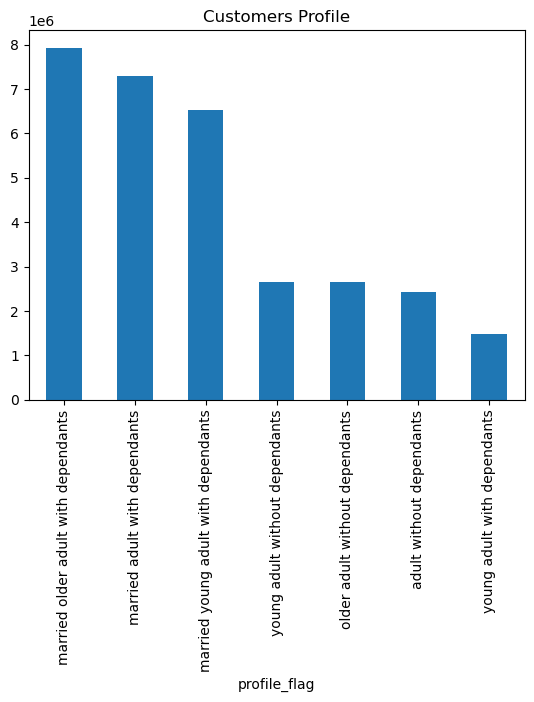

In [125]:
# Bar Chart showing the distribution of the column 'profile_flag'

profile_flag_bar = df_opd['profile_flag'].value_counts().plot.bar(title = 'Customers Profile')

In [126]:
# Exporting the bar chart profile_flag_bar to profile_flag.png

profile_flag_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'profile_flag.png'))

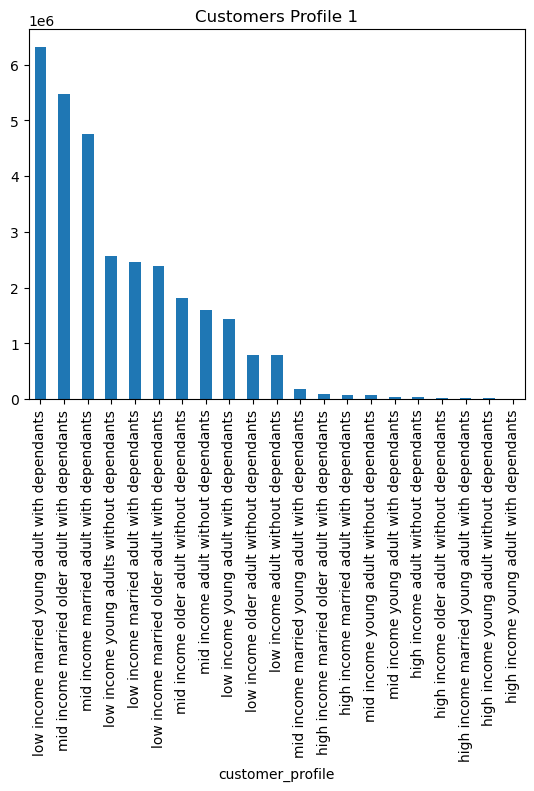

In [127]:
# Bar Chart showing the distribution of the column 'customer_profile'

customer_profile_bar = df_opd['customer_profile'].value_counts().plot.bar(title = 'Customers Profile 1')

In [128]:
# Exporting the bar chart customer_profile_bar to customer_profile.png

customer_profile_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'customer_profile.png'))

# 6. Aggregate the min, max and mean variables

In [130]:
# Aggregate the min, max and mean for customers age for usage and expenditure

Agg_age_group = df_opd.groupby('Age_group')[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [131]:
Agg_age_group

days_since_prior_order                  prices        \
                                     min   max       mean    min   max   
Age_group                                                                
18 - 29 years old                    0.0  30.0  10.815269    1.0  25.0   
30 - 39 years old                    0.0  30.0  10.806490    1.0  25.0   
40 - 49 years old                    0.0  30.0  10.796786    1.0  25.0   
50 - 59 years old                    0.0  30.0  10.842821    1.0  25.0   
60 - 69 years old                    0.0  30.0  10.791545    1.0  25.0   
70 - 81 years old                    0.0  30.0  10.808135    1.0  25.0   

                             
                       mean  
Age_group                    
18 - 29 years old  7.782198  
30 - 39 years old  7.787961  
40 - 49 years old  7.798234  
50 - 59 years old  7.784991  
60 - 69 years old  7.799586  
70 - 81 years old  7.792055

In [132]:
# Aggregate the min, max and mean for customers income for usage and expenditure

Agg_income_group = df_opd.groupby('Income_group')[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [133]:
Agg_income_group

days_since_prior_order                  prices                
                                 min   max       mean    min   max      mean
Income_group                                                                
high income                      0.0  30.0  10.093070    1.0  25.0  7.777393
lower income                     0.0  30.0  10.844815    1.0  25.0  7.652564
middle income                    0.0  30.0  10.782082    1.0  25.0  7.956613

In [134]:
# Aggregate the min, max and mean for number of dependants for usage and expenditure

Agg_dependants_group = df_opd.groupby('Dependants_group')[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [135]:
Agg_dependants_group

days_since_prior_order                  prices        \
                                    min   max       mean    min   max   
Dependants_group                                                        
has dependants                      0.0  30.0  10.816416    1.0  25.0   
no dependants                       0.0  30.0  10.791951    1.0  25.0   

                            
                      mean  
Dependants_group            
has dependants    7.790937  
no dependants     7.789550

In [136]:
# Checking the output

df_opd.head()

,order_id,user_id,order_number,orders_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,income,Region,Activity flag,department,_merge,Age_group,Income_group,Dependants_group,profile_flag,customer_profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,40423,South,Normal activity,beverages,both,30 - 39 years old,lower income,has dependants,married young adult with dependants,low income married young adult with dependants
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,40423,South,Normal activity,beverages,both,30 - 39 years old,lower income,has dependants,married young adult with dependants,low income married young adult with dependants
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,40423,South,Normal activity,beverages,both,30 - 39 years old,lower income,has dependants,married young adult with dependants,low income married young adult with dependants
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,40423,South,Normal activity,beverages,both,30 - 39 years old,lower income,has dependants,married young adult with dependants,low income married young adult with dependants
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,40423,South,Normal activity,beverages,both,30 - 39 years old,lower income,has dependants,married young adult with dependants,low income married young adult with dependants


In [137]:
# Displays the column names and the data types

df_opd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30964564 entries, 0 to 30964563
Data columns (total 39 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   order_number            int64   
 3   orders_days_of_week     int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  price_range_loc         object  
 14  busiest day             object  
 15  busiest days            object  
 16  busiest_period_of_day   object  
 17  max_order               int64   
 18  loyalty_flag            object  
 19  average_price           float64 
 20  spending_flag           object  
 21  median

# 7. Comparing the customer profiles with region and department

# Customer profiles with Region

In [185]:
# Group by profile_flag and region
cust_profile1_region = df_opd.groupby(['profile_flag', 'Region']).size().unstack()

In [186]:
cust_profile1_region

Region,Midwest,Northeast,South,West
profile_flag,,,,
adult without dependants,589855,405554,799017,639409
married adult with dependants,1733214,1303165,2382454,1872282
married older adult with dependants,1838245,1405462,2644107,2041419
married young adult with dependants,1515803,1145146,2197188,1665226
older adult without dependants,617198,478767,877314,671992
young adult with dependants,351435,256430,505457,367850
young adult without dependants,615763,470161,905602,669049


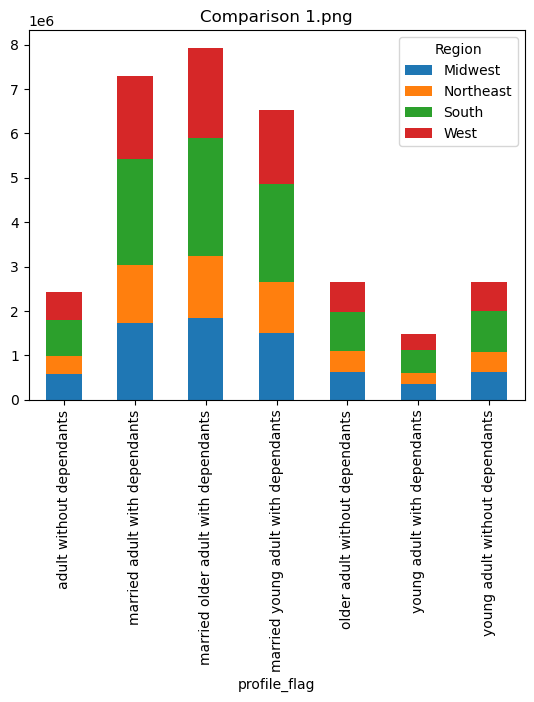

In [187]:
# Creating a bar chart for profile_flag and region

cust_profile1_region = cust_profile1_region.plot.bar(stacked = True, title = 'Comparison 1.png')

In [188]:
# Exporting the bar chart

cust_profile1_region.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'profile1_region.png'))

In [189]:
# Group by customer profile and region

cust_profile2_region = df_opd.groupby(['customer_profile', 'Region']).size().unstack()

In [190]:
cust_profile2_region

Region,Midwest,Northeast,South,West
customer_profile,,,,
high income adult without dependants,6076,4553,11088,6985
high income married adult with dependants,18273,12145,21603,24415
high income married older adult with dependants,22897,13224,29346,19834
high income married young adult with dependants,5027,1750,10369,6595
high income older adult without dependants,5611,5313,7631,5872
high income young adult with dependants,629,508,1211,1710
high income young adult without dependants,5580,2613,2198,1086
low income adult without dependants,188100,142102,258344,210125
low income married adult with dependants,555863,424481,831185,648302


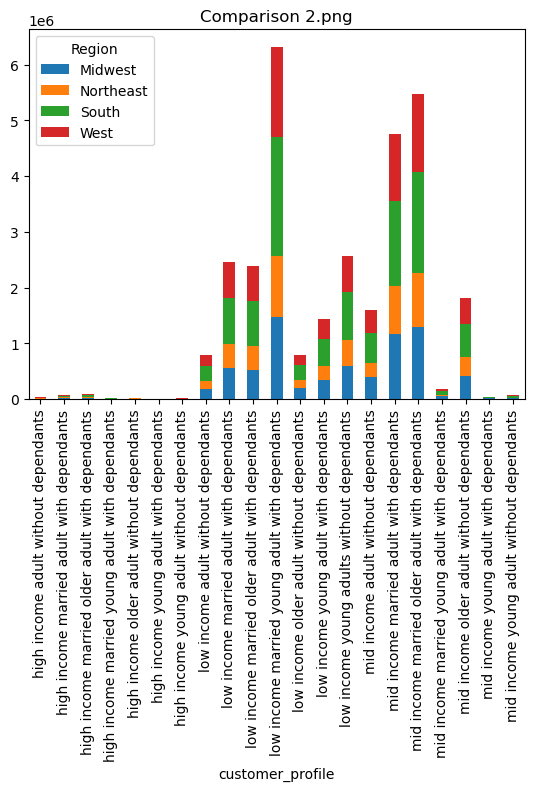

In [191]:
# Create a bar chart for customer profile and region

cust_profile2_region = cust_profile2_region.plot.bar(stacked = True, title = 'Comparison 2.png')

In [192]:
# Exporting the bar chart

cust_profile2_region.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'profile2_region.png'))

# The above chart illustrates that West region are on top when comparing the customer profile and regions, which is then followed by the South region.

# Customer profiles by department

In [193]:
# Group by profile_flag and department

cust_profile1_dept = df_opd.groupby(['profile_flag', 'department']).size().unstack()

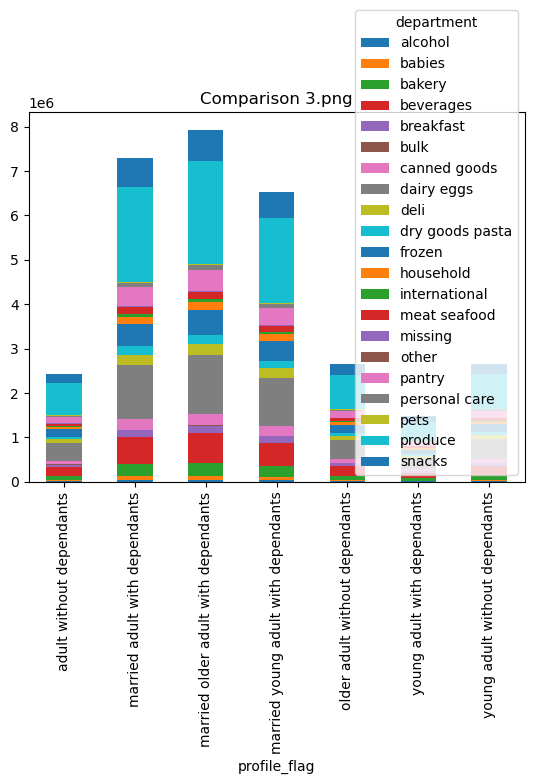

In [195]:
# Create a bar chart for profile_flag and department

cust_profile1_dept = cust_profile1_dept.plot.bar(stacked = True, title = 'Comparison 3.png')

In [202]:
# Group by customer profile and department

cust_profile2_dept = df_opd.groupby(['customer_profile', 'department']).size().unstack()

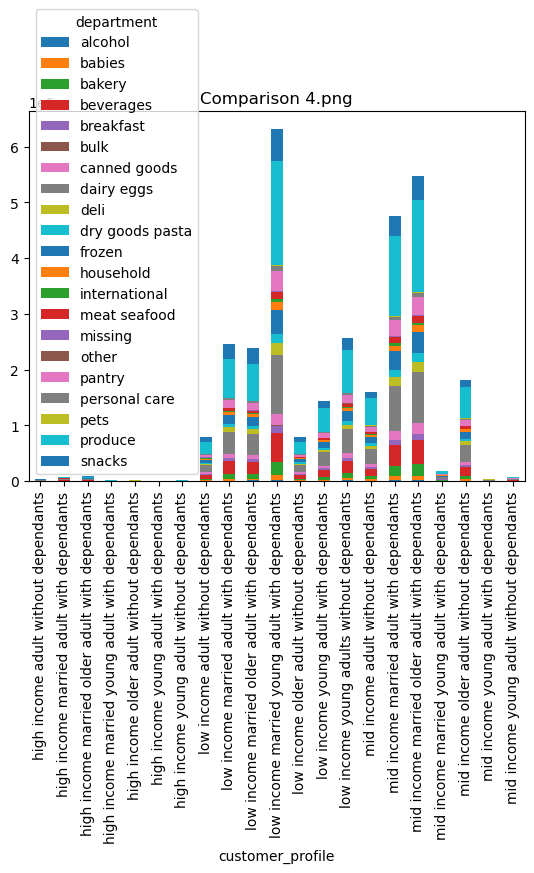

In [203]:
# Create a bar chart for customer_profile and department

cust_profile2_dept = cust_profile2_dept.plot.bar(stacked = True, title = 'Comparison 4.png')


In [204]:
# Exporting bar charts

cust_profile1_dept.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'profile1_dept.png'))

In [205]:
cust_profile2_dept.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'profile2_dept.png'))

# The above chart illustrates that Snacks and the Produce department are the top departments, especially for the 'married' group with low and middle income.